# Notebook Introduction

This Jupyter Notebook provides an intuitive understanding of how the position value changes over time for different drift and volatility functions. It explores the concept of stochastic processes and simulates the movement of a financial asset using the Euler-Maruyama method.

By running the code cells, you can visualize the simulated paths of the asset's position value and observe how they evolve over time. The notebook utilizes libraries such as NumPy and Matplotlib for data manipulation and plotting.

The position value is model as a stochastic differntial equation (SDE) of the form:
$$dX_t = \mu(t, X_t) dt + \sigma(t, X_t) dB_t$$
where:
The time step size $dt$ is calculated as `T`/`N`, which is the duration of each time step. The larger the value of `N`, the smaller the time step $dt$, leading to a more finely resolved simulation.

Here's a brief summary of the parameters:

- `X0`: Initial value of the process $X_0$.
- `T`: Terminal time (end time of the simulation).
- `N`: Number of time steps.
- `M`: Number of paths (simulations) to generate.

Feel free to modify the code and parameters to explore different scenarios and gain insights into the behavior of stochastic processes. 

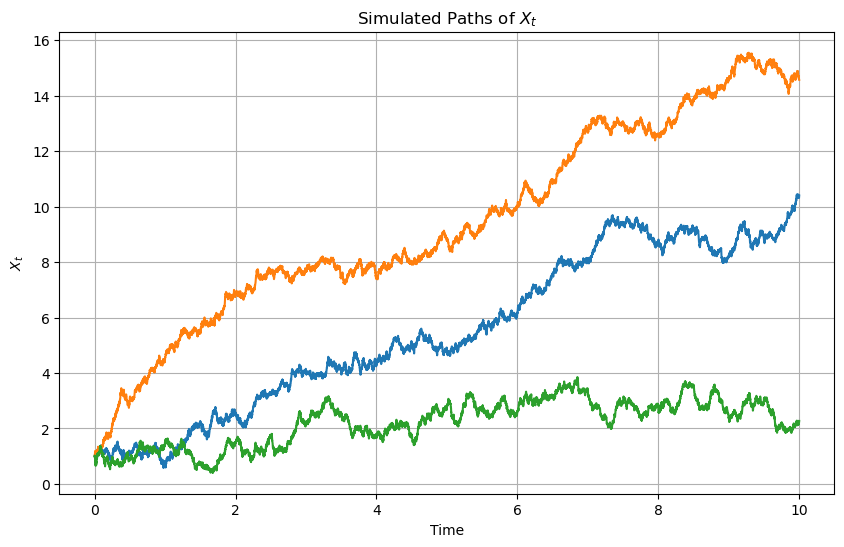

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


# Parameters
X0 = 1  # Initial value
T = 10  # Terminal time
N = 10000  # Number of time steps
M = 3  # Number of paths

# Define the functions for mu(t, x) and sigma(t, x)
def mu(t, x):
    return 1  # Change this function as needed

def sigma(t, x):
    return 1  # Change this function as needed

# Simulate the stochastic process using the Euler-Maruyama method
def simulate_X_t(mu, sigma, X0, T, N, M):
    dt = T / N
    t = np.linspace(0, T, N+1)
    X = np.zeros((M, N+1))
    X[:, 0] = X0
    
    for i in range(N):
        dB = np.sqrt(dt) * np.random.randn(M)
        X[:, i+1] = X[:, i] + mu(t[i], X[:, i]) * dt + sigma(t[i], X[:, i]) * dB
    
    return t, X


# Simulate the process
t, X = simulate_X_t(mu, sigma, X0, T, N, M)

# Plot the simulated paths
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, X[i, :], lw=1.5)
plt.xlabel('Time')
plt.ylabel('$X_t$')
plt.title('Simulated Paths of $X_t$')
plt.grid(True)
plt.show()